In [1]:
import sys
sys.path.append("../")
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import animation
from tqdm import *

from theory.units import *
from simulation.demo_sim import DemoSim

from IPython.display import HTML
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Make banner animation gif for code repo

The main interface is through the class `DemoSim`, which takes `theta_x_lims` and `theta_y_lims` as arguments. These are 2-arrays that describe the `x` and `y` coordinate limits of the figure, in arcsecs.

`DemoSim.animation()` creates the figure or animation. Its arguments are specified in the docstring:

        """
        :param pos_l: tuple of lens positions, format [[x_1, y_1], [x_2, y_2]...]
        :param M_l: tuple of lens masses
        :param R_l: tuple of lens sizes (Gaussian lens)
        :param v_l: tuple of lens velocities
        :param D_l: tuple of distances of lenses
        :param n_lens_x: number of x-grid points across canvas to plot lenses; default 200
        :param n_lens_y: number of y-grid points across canvas to plot lenses; default 200
        :param n_dens: density of sources (per arcsecs^2); default 20
        :param source_pos: must be one of ["uniform", "random"]; default "random"
        :param custom_source_pos: optional custom positions to put down sources, format [[x_1, y_1], [x_2, y_2]...]
        :param arrow_mult: stretch velocity arrows by this factor; default 2000
        :param figsize: size of canvas, according to matplotlib format; default (16, 9)
        :param animate: whether to animate; default True
        :param dt: cosmological time interval between subsequent animation frames; default 10 [years]
        :param interval: real time interval between subsequent animation frames; default 10 ms
        :param n_frames: number of frames to animate; default 100
        :param show_lens: whether to plot lens; default True
        :param show_sources: whether to plot sources; default True
        :param show_orig: whether to plot unperturbed sources; default False
        :param show_vel_arrows: whether to plot instantaneous velocity vectors; default False
        :param star_kwargs: star plotting options; matplotlib defaults by default
        :param star_orig_kwargs: unperturbed star plotting options; matplotlib defaults by default
        :param arrow_kwargs: arrow plotting options; matplotlib defaults by default
        :return: animation or figure, depending on whether `animation=True` or `animation=False`
        """

The animation/figure returned by `DemoSim.animation()` can be saved as usual with plt.savefig() if `animation=False`, or

- viewed with HTML(anim.to_html5_video()) for inline video,
- `anim.save("output.mp4")` to save mp4 video,
- `anim.save("output.gif", writer='imagemagick', fps=25) to save a gif.

In [2]:
from plot_params import params

pylab.rcParams.update(params)
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']
output_dir = "../plots/"

/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/smsharma/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


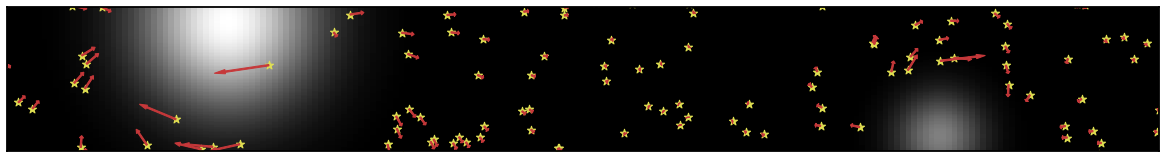

In [8]:
# Coordinates
theta_x_lims = [-1.6 / 2., 1.6 / 2.]
theta_y_lims = [-0.9 / 9., 0.9 / 9.]

ds = DemoSim(theta_x_lims, theta_y_lims)

# Plot styles
arrow_kwargs={'color':cols_default[0], 'width':0.01}
star_kwargs={'marker':'*', 'color':cols_default[5],'s':75}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':75}

# Lens properties 
n_lens = 2

pos_l_ary = np.array([[-0.5, 0.08], [0.5, -0.08]])
v_l_ary = np.array([[20, 0], [-10, 0]]) * Kmps
R_l_ary = np.array([0.04, 0.02]) * pc
M_l_ary = 10 ** np.array([5.3, 5.]) * M_s

# Create animation
anim = ds.animation(dt=100, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=len(M_l_ary)*[100 * kpc], n_frames=650, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=200, n_lens_y=100, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 3000,
                    source_pos="random",
                   figsize=(10 * (theta_x_lims[1] - theta_x_lims[0]), 10 * (theta_y_lims[1] - theta_y_lims[0])))

In [9]:
HTML(anim.to_html5_video())

In [11]:
anim.save("/Users/smsharma/Desktop/correlations.gif", writer='imagemagick', fps=25)
# anim.save(output_dir + "correlations.gif", writer='imagemagick', fps=25)